In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
#Commercial Total Energy Consumed
com_series_stateids =["SEDS.TECCB.AL.A", "SEDS.TECCB.AK.A", "SEDS.TECCB.AZ.A", "SEDS.TECCB.AR.A", "SEDS.TECCB.CA.A", 
                      "SEDS.TECCB.CO.A", "SEDS.TECCB.CT.A", "SEDS.TECCB.DC.A", "SEDS.TECCB.DE.A", "SEDS.TECCB.FL.A", 
                      "SEDS.TECCB.GA.A", "SEDS.TECCB.HI.A", "SEDS.TECCB.ID.A", "SEDS.TECCB.IL.A", "SEDS.TECCB.IN.A", 
                      "SEDS.TECCB.IA.A", "SEDS.TECCB.KS.A", "SEDS.TECCB.KY.A", "SEDS.TECCB.LA.A", "SEDS.TECCB.ME.A", 
                      "SEDS.TECCB.MD.A", "SEDS.TECCB.MA.A", "SEDS.TECCB.MI.A", "SEDS.TECCB.MN.A", "SEDS.TECCB.MS.A", 
                      "SEDS.TECCB.MO.A", "SEDS.TECCB.MT.A", "SEDS.TECCB.NE.A", "SEDS.TECCB.NV.A", "SEDS.TECCB.NH.A", 
                      "SEDS.TECCB.NJ.A", "SEDS.TECCB.NM.A", "SEDS.TECCB.NY.A", "SEDS.TECCB.NC.A", "SEDS.TECCB.ND.A", 
                      "SEDS.TECCB.OH.A", "SEDS.TECCB.OK.A", "SEDS.TECCB.OR.A", "SEDS.TECCB.PA.A", "SEDS.TECCB.RI.A", 
                      "SEDS.TECCB.SC.A", "SEDS.TECCB.SD.A", "SEDS.TECCB.TN.A", "SEDS.TECCB.TX.A", "SEDS.TECCB.UT.A", 
                      "SEDS.TECCB.VT.A", "SEDS.TECCB.VA.A", "SEDS.TECCB.WA.A", "SEDS.TECCB.WV.A", "SEDS.TECCB.WI.A", 
                      "SEDS.TECCB.WY.A", "SEDS.TECCB.US.A"]

In [3]:
api_key = '6137f2c566df03b61653f96b7dc5d69d'

In [4]:
energy_consumption = {}
state_name = []
year = []
consumption = []

In [5]:
for row in com_series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
#     year=[]
#     energy_consumed = []
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 263457], ['2014', 262497], ['2013', 256750], ['2012', 244919], ['2011', 257067], ['2010', 270504], ['2009', 257060], ['2008', 271267], ['2007', 276430], ['2006', 268294], ['2005', 260757], ['2004', 257993], ['2003', 249280], ['2002', 250226], ['2001', 243613], ['2000', 250773]]
USA-AL
[['2015', 66983], ['2014', 63219], ['2013', 62922], ['2012', 69598], ['2011', 70816], ['2010', 66822], ['2009', 61825], ['2008', 64441], ['2007', 63076], ['2006', 67572], ['2005', 62403], ['2004', 63451], ['2003', 58567], ['2002', 60184], ['2001', 66274], ['2000', 69873]]
USA-AK
[['2015', 347477], ['2014', 342287], ['2013', 349984], ['2012', 343783], ['2011', 347514], ['2010', 333894], ['2009', 332909], ['2008', 342185], ['2007', 341414], ['2006', 333127], ['2005', 322978], ['2004', 313878], ['2003', 310692], ['2002', 311230], ['2001', 312480], ['2000', 314579]]
USA-AZ
[['2015', 179155], ['2014', 182202], ['2013', 176523], ['2012', 170147], ['2011', 174604], ['2010', 174500], ['2009', 164583], [

[['2015', 124431], ['2014', 120758], ['2013', 121677], ['2012', 118128], ['2011', 119870], ['2010', 117553], ['2009', 115460], ['2008', 122539], ['2007', 124368], ['2006', 126244], ['2005', 120281], ['2004', 119144], ['2003', 116777], ['2002', 114184], ['2001', 109386], ['2000', 110213]]
USA-NV
[['2015', 72019], ['2014', 71056], ['2013', 69952], ['2012', 66272], ['2011', 66407], ['2010', 66146], ['2009', 67673], ['2008', 68326], ['2007', 69762], ['2006', 68970], ['2005', 76208], ['2004', 73636], ['2003', 72415], ['2002', 68997], ['2001', 66199], ['2000', 65847]]
USA-NH
[['2015', 596251], ['2014', 631418], ['2013', 607669], ['2012', 607156], ['2011', 635590], ['2010', 632896], ['2009', 633627], ['2008', 639790], ['2007', 652547], ['2006', 621617], ['2005', 654297], ['2004', 638074], ['2003', 610226], ['2002', 581672], ['2001', 557204], ['2000', 581258]]
USA-NJ
[['2015', 125176], ['2014', 125903], ['2013', 126204], ['2012', 125840], ['2011', 126817], ['2010', 123544], ['2009', 120498], [

In [6]:
com_df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
com_df_info.head()

,State,Year,Consumption
0,USA-AL,2015,263457
1,USA-AL,2014,262497
2,USA-AL,2013,256750
3,USA-AL,2012,244919
4,USA-AL,2011,257067


In [7]:
state = com_df_info["State"].unique()
y2015 = com_df_info.loc[com_df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = com_df_info.loc[com_df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = com_df_info.loc[com_df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = com_df_info.loc[com_df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = com_df_info.loc[com_df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = com_df_info.loc[com_df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = com_df_info.loc[com_df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = com_df_info.loc[com_df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = com_df_info.loc[com_df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = com_df_info.loc[com_df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = com_df_info.loc[com_df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = com_df_info.loc[com_df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = com_df_info.loc[com_df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = com_df_info.loc[com_df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = com_df_info.loc[com_df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = com_df_info.loc[com_df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [8]:
com_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
com_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,263457,262497,256750,244919,257067,270504,257060,271267,276430,268294,260757,257993,249280,250226,243613,250773
1,USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,62403,63451,58567,60184,66274,69873
2,USA-AZ,347477,342287,349984,343783,347514,333894,332909,342185,341414,333127,322978,313878,310692,311230,312480,314579
3,USA-AR,179155,182202,176523,170147,174604,174500,164583,166933,162806,158434,163193,153539,153730,151491,150150,146310
4,USA-CA,1462756,1432703,1430427,1488960,1538314,1510438,1514229,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275


In [9]:
com_consumption_df = com_consumption_df.set_index('State')
com_consumption_df['SubTotal'] = (com_consumption_df['2015'] + com_consumption_df['2014'] + com_consumption_df['2013'] + 
                               com_consumption_df['2012'] + com_consumption_df['2011'] + com_consumption_df['2010'] +
                               com_consumption_df['2009'] + com_consumption_df['2008'] + com_consumption_df['2007'] +
                               com_consumption_df['2006'] + com_consumption_df['2005'] + com_consumption_df['2004'] +
                               com_consumption_df['2003'] + com_consumption_df['2002'] + com_consumption_df['2001'] +
                               com_consumption_df['2000'])

com_consumption_df.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,263457,262497,256750,244919,257067,270504,257060,271267,276430,268294,260757,257993,249280,250226,243613,250773,4140887
USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,62403,63451,58567,60184,66274,69873,1038026
USA-AZ,347477,342287,349984,343783,347514,333894,332909,342185,341414,333127,322978,313878,310692,311230,312480,314579,5300411
USA-AR,179155,182202,176523,170147,174604,174500,164583,166933,162806,158434,163193,153539,153730,151491,150150,146310,2628300
USA-CA,1462756,1432703,1430427,1488960,1538314,1510438,1514229,1572133,1536055,1521164,1484593,1535683,1422511,1453641,1443700,1354275,23701582


In [10]:
com_consumption_df.to_csv("Commercial_Energy_Consumption.csv")

In [11]:
#Industrial Total Energy Consumed
ind_series_stateids =["SEDS.TEICB.AL.A", "SEDS.TEICB.AK.A", "SEDS.TEICB.AZ.A", "SEDS.TEICB.AR.A", "SEDS.TEICB.CA.A", 
                      "SEDS.TEICB.CO.A", "SEDS.TEICB.CT.A", "SEDS.TEICB.DC.A", "SEDS.TEICB.DE.A", "SEDS.TEICB.FL.A", 
                      "SEDS.TEICB.GA.A", "SEDS.TEICB.HI.A", "SEDS.TEICB.ID.A", "SEDS.TEICB.IL.A", "SEDS.TEICB.IN.A", 
                      "SEDS.TEICB.IA.A", "SEDS.TEICB.KS.A", "SEDS.TEICB.KY.A", "SEDS.TEICB.LA.A", "SEDS.TEICB.ME.A", 
                      "SEDS.TEICB.MD.A", "SEDS.TEICB.MA.A", "SEDS.TEICB.MI.A", "SEDS.TEICB.MN.A", "SEDS.TEICB.MS.A", 
                      "SEDS.TEICB.MO.A", "SEDS.TEICB.MT.A", "SEDS.TEICB.NE.A", "SEDS.TEICB.NV.A", "SEDS.TEICB.NH.A", 
                      "SEDS.TEICB.NJ.A", "SEDS.TEICB.NM.A", "SEDS.TEICB.NY.A", "SEDS.TEICB.NC.A", "SEDS.TEICB.ND.A", 
                      "SEDS.TEICB.OH.A", "SEDS.TEICB.OK.A", "SEDS.TEICB.OR.A", "SEDS.TEICB.PA.A", "SEDS.TEICB.RI.A", 
                      "SEDS.TEICB.SC.A", "SEDS.TEICB.SD.A", "SEDS.TEICB.TN.A", "SEDS.TEICB.TX.A", "SEDS.TEICB.UT.A", 
                      "SEDS.TEICB.VT.A", "SEDS.TEICB.VA.A", "SEDS.TEICB.WA.A", "SEDS.TEICB.WV.A", "SEDS.TEICB.WI.A", 
                      "SEDS.TEICB.WY.A", "SEDS.TEICB.US.A"]

In [12]:
energy_consumption = {}
state_name = []
year = []
consumption = []

In [13]:
for row in ind_series_stateids:
    url = "http://api.eia.gov/series/?"
    query_url = url + "api_key=" + api_key + "&series_id="
#     year=[]
#     energy_consumed = []
    response = requests.get(query_url + row).json()['series'][0]['data'][3:19]
    name_response = requests.get(query_url + row).json()['series'][0]['geography']
        
    for item in response:
        state_name.append(name_response)
        year.append(item[0])
        consumption.append(item[1])
        
    print(response)
    print(name_response)

[['2015', 823765], ['2014', 861143], ['2013', 850439], ['2012', 835514], ['2011', 804046], ['2010', 774098], ['2009', 711199], ['2008', 876097], ['2007', 915657], ['2006', 933217], ['2005', 930987], ['2004', 941966], ['2003', 877629], ['2002', 857704], ['2001', 849465], ['2000', 990428]]
USA-AL
[['2015', 331209], ['2014', 330421], ['2013', 334286], ['2012', 339183], ['2011', 331420], ['2010', 326937], ['2009', 334430], ['2008', 317535], ['2007', 356533], ['2006', 353673], ['2005', 418115], ['2004', 389872], ['2003', 402842], ['2002', 411348], ['2001', 409960], ['2000', 401675]]
USA-AK
[['2015', 236211], ['2014', 236530], ['2013', 213634], ['2012', 220120], ['2011', 224978], ['2010', 208272], ['2009', 197015], ['2008', 232755], ['2007', 221076], ['2006', 226196], ['2005', 220120], ['2004', 224216], ['2003', 198138], ['2002', 204137], ['2001', 213987], ['2000', 225886]]
USA-AZ
[['2015', 377764], ['2014', 412848], ['2013', 412235], ['2012', 405144], ['2011', 421820], ['2010', 410689], ['2

[['2015', 164315], ['2014', 182936], ['2013', 170555], ['2012', 166621], ['2011', 164970], ['2010', 173174], ['2009', 171169], ['2008', 182066], ['2007', 186774], ['2006', 197213], ['2005', 189095], ['2004', 181718], ['2003', 169033], ['2002', 161019], ['2001', 171342], ['2000', 167933]]
USA-NV
[['2015', 41806], ['2014', 43179], ['2013', 42820], ['2012', 40058], ['2011', 40228], ['2010', 39217], ['2009', 36822], ['2008', 42240], ['2007', 43603], ['2006', 46242], ['2005', 51690], ['2004', 54173], ['2003', 52118], ['2002', 47723], ['2001', 53319], ['2000', 57848]]
USA-NH
[['2015', 262799], ['2014', 259397], ['2013', 271076], ['2012', 274978], ['2011', 276945], ['2010', 271319], ['2009', 263184], ['2008', 316726], ['2007', 366890], ['2006', 365106], ['2005', 390565], ['2004', 386626], ['2003', 396163], ['2002', 425522], ['2001', 442134], ['2000', 411502]]
USA-NJ
[['2015', 226406], ['2014', 230243], ['2013', 220821], ['2012', 226028], ['2011', 223188], ['2010', 214491], ['2009', 210928], [

In [14]:
ind_df_info = pd.DataFrame({"State" : state_name, "Year" : year, "Consumption" : consumption})
ind_df_info.head()

,State,Year,Consumption
0,USA-AL,2015,823765
1,USA-AL,2014,861143
2,USA-AL,2013,850439
3,USA-AL,2012,835514
4,USA-AL,2011,804046


In [15]:
state = ind_df_info["State"].unique()
y2015 = ind_df_info.loc[ind_df_info["Year"] == "2015",:]   
y2015_data = y2015["Consumption"].values

y2014 = ind_df_info.loc[ind_df_info["Year"] == "2014",:]   
y2014_data = y2014["Consumption"].values

y2013 = ind_df_info.loc[ind_df_info["Year"] == "2013",:]   
y2013_data = y2013["Consumption"].values

y2012 = ind_df_info.loc[ind_df_info["Year"] == "2012",:]   
y2012_data = y2012["Consumption"].values

y2011 = ind_df_info.loc[ind_df_info["Year"] == "2011",:]   
y2011_data = y2011["Consumption"].values

y2010 = ind_df_info.loc[ind_df_info["Year"] == "2010",:]   
y2010_data = y2010["Consumption"].values

y2009 = ind_df_info.loc[ind_df_info["Year"] == "2009",:]   
y2009_data = y2009["Consumption"].values

y2008 = ind_df_info.loc[ind_df_info["Year"] == "2008",:]   
y2008_data = y2008["Consumption"].values

y2007 = ind_df_info.loc[ind_df_info["Year"] == "2007",:]   
y2007_data = y2007["Consumption"].values

y2006 = ind_df_info.loc[ind_df_info["Year"] == "2006",:]   
y2006_data = y2006["Consumption"].values

y2005 = ind_df_info.loc[ind_df_info["Year"] == "2005",:]   
y2005_data = y2005["Consumption"].values

y2004 = ind_df_info.loc[ind_df_info["Year"] == "2004",:]   
y2004_data = y2004["Consumption"].values

y2003 = ind_df_info.loc[ind_df_info["Year"] == "2003",:]   
y2003_data = y2003["Consumption"].values

y2002 = ind_df_info.loc[ind_df_info["Year"] == "2002",:]   
y2002_data = y2002["Consumption"].values

y2001 = ind_df_info.loc[ind_df_info["Year"] == "2001",:]   
y2001_data = y2001["Consumption"].values

y2000 = ind_df_info.loc[ind_df_info["Year"] == "2000",:]   
y2000_data = y2000["Consumption"].values

In [16]:
ind_consumption_df = pd.DataFrame({"State":state, "2015":y2015_data, "2014":y2014_data, "2013":y2013_data, "2012":y2012_data,
                                   "2011":y2011_data, "2010":y2010_data, "2009":y2009_data, "2008":y2008_data, "2007":y2007_data,
                                   "2006":y2006_data, "2005":y2005_data, "2004":y2004_data, "2003":y2003_data, "2002":y2002_data,
                                   "2001":y2001_data, "2000":y2000_data})
ind_consumption_df.head()

,State,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,USA-AL,823765,861143,850439,835514,804046,774098,711199,876097,915657,933217,930987,941966,877629,857704,849465,990428
1,USA-AK,331209,330421,334286,339183,331420,326937,334430,317535,356533,353673,418115,389872,402842,411348,409960,401675
2,USA-AZ,236211,236530,213634,220120,224978,208272,197015,232755,221076,226196,220120,224216,198138,204137,213987,225886
3,USA-AR,377764,412848,412235,405144,421820,410689,365081,421531,440996,441382,431591,435855,444429,456906,447636,476543
4,USA-CA,1849780,1859203,1884895,1747060,1784583,1740127,1713404,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271


In [17]:
ind_consumption_df = ind_consumption_df.set_index("State")
ind_consumption_df['SubTotal'] = (ind_consumption_df['2015'] + ind_consumption_df['2014'] + ind_consumption_df['2013'] + 
                               ind_consumption_df['2012'] + ind_consumption_df['2011'] + ind_consumption_df['2010'] +
                               ind_consumption_df['2009'] + ind_consumption_df['2008'] + ind_consumption_df['2007'] +
                               ind_consumption_df['2006'] + ind_consumption_df['2005'] + ind_consumption_df['2004'] +
                               ind_consumption_df['2003'] + ind_consumption_df['2002'] + ind_consumption_df['2001'] +
                               ind_consumption_df['2000'])
ind_consumption_df

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,SubTotal
State,,,,,,,,,,,,,,,,,
USA-AL,823765,861143,850439,835514,804046,774098,711199,876097,915657,933217,930987,941966,877629,857704,849465,990428,13833354
USA-AK,331209,330421,334286,339183,331420,326937,334430,317535,356533,353673,418115,389872,402842,411348,409960,401675,5789439
USA-AZ,236211,236530,213634,220120,224978,208272,197015,232755,221076,226196,220120,224216,198138,204137,213987,225886,3503271
USA-AR,377764,412848,412235,405144,421820,410689,365081,421531,440996,441382,431591,435855,444429,456906,447636,476543,6802450
USA-CA,1849780,1859203,1884895,1747060,1784583,1740127,1713404,1846322,1894789,1908391,1937656,1997588,1928700,1953103,2089449,2094271,30229321
USA-CO,440348,431776,415087,421180,421232,455480,414088,412273,405162,396319,387747,376686,371668,356356,378721,312254,6396377
USA-CT,78393,85921,88143,83352,86015,88602,87157,81049,107395,111351,118448,116461,122066,107708,114029,124719,1600809
USA-DC,6958,7260,7151,7014,6816,7275,7139,3645,4197,3821,4020,4516,4763,4514,4441,3906,87436
USA-DE,89074,87476,90725,92276,85081,50473,58909,90123,90639,92197,97921,95307,109899,113831,113066,112954,1469951


In [18]:
ind_consumption_df.to_csv("Industrial_Energy_Consumption.csv")

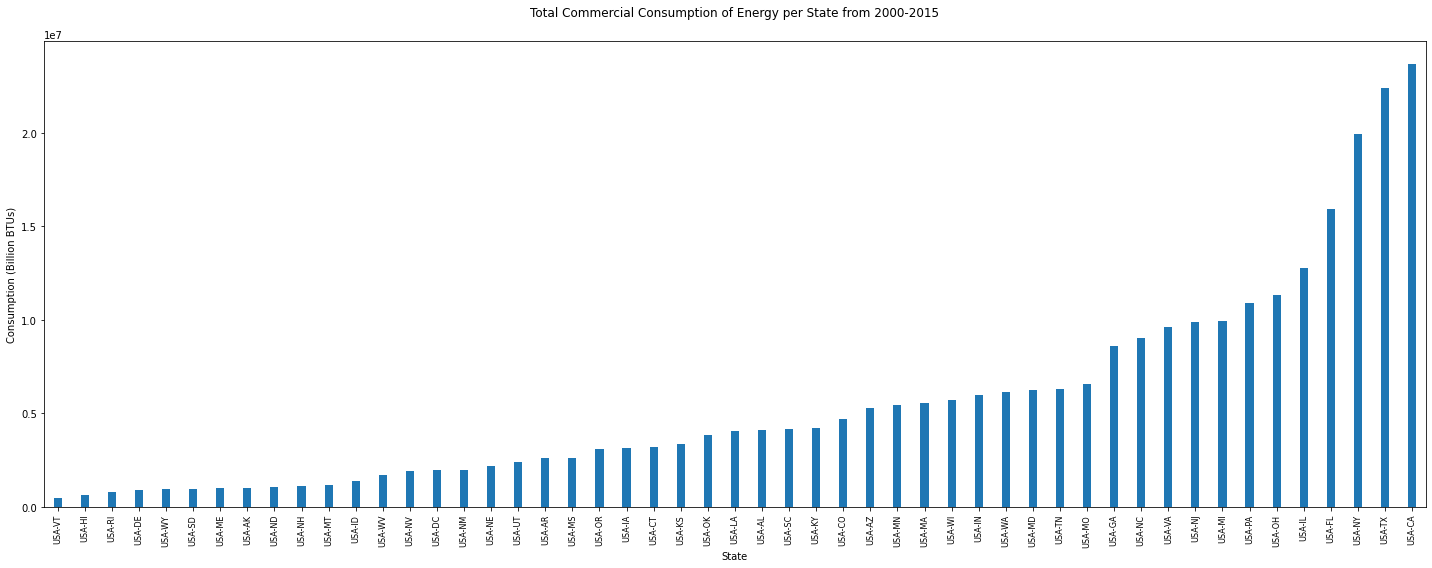

In [19]:
com_df = com_consumption_df.drop(['USA'])
com_df = com_df.sort_values('SubTotal')

totals = com_df["SubTotal"]
states = com_df.index.values
ttl = "Total Commercial Consumption of Energy per State from 2000-2015"

x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49,50]

plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

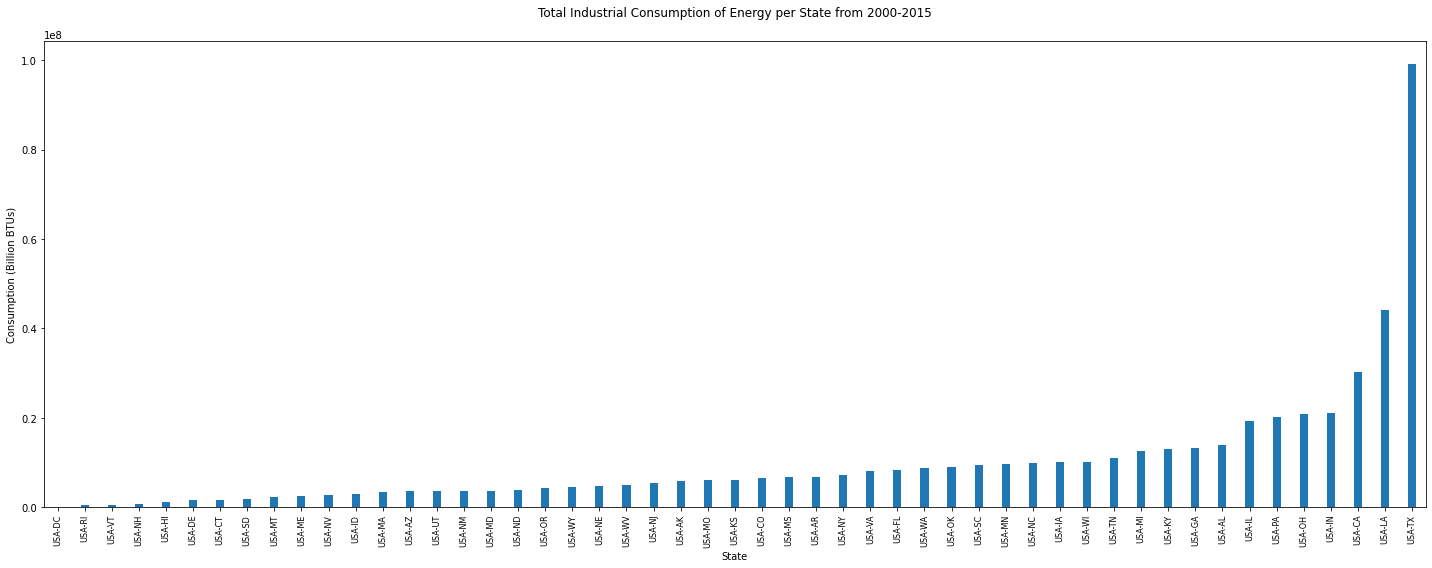

In [20]:
ind_df = ind_consumption_df.drop(['USA'])
#com_df.iloc[com_df['SubTotal'.argsort()]
#com_df.sort_values(com_df['SubTotal'])
ind_df = ind_df.sort_values('SubTotal')
totals = ind_df["SubTotal"]
states = ind_df.index.values
ttl = "Total Industrial Consumption of Energy per State from 2000-2015"

x = states
y = totals.values
x_position = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
              41,42,43,44,45,46,47,48,49]

plt.figure(figsize=(20,8))
plt.bar(x, y, width=0.3, align="center")
plt.title(ttl, pad=25)
plt.xlabel("State")
plt.ylabel("Consumption (Billion BTUs)")
plt.xticks(x, rotation='vertical')
plt.tick_params(axis='x', labelsize=8)
plt.xlim(-0.5, (len(x) - 0.5))
plt.tight_layout()
plt.show()

In [22]:
com_ind_df = pd.merge(com_df, ind_df, on='State', suffixes=('_Com', '_Ind'))
com_ind_df

,2015_Com,2014_Com,2013_Com,2012_Com,2011_Com,2010_Com,2009_Com,2008_Com,2007_Com,2006_Com,...,2008_Ind,2007_Ind,2006_Ind,2005_Ind,2004_Ind,2003_Ind,2002_Ind,2001_Ind,2000_Ind,SubTotal_Ind
State,,,,,,,,,,,,,,,,,,,,,
USA-VT,27659,26947,26019,22817,29071,28959,29273,28564,29426,29542,...,24124,26619,28086,28137,29543,24674,25662,26465,27250,402544
USA-HI,41330,41137,40590,39187,41157,40111,40682,40866,40243,40680,...,65843,69038,71564,72369,68904,68832,70728,69465,77944,1098713
USA-RI,49527,51615,48627,44074,43930,45788,46284,46082,49708,49144,...,26773,20887,23915,24289,24648,24422,22245,23277,25933,386924
USA-DE,57364,57866,56940,56847,59093,63083,62977,61607,60347,57891,...,90123,90639,92197,97921,95307,109899,113831,113066,112954,1469951
USA-WY,62835,62483,63039,63907,67476,63532,62331,64011,61546,59390,...,301152,289111,253287,239560,241183,246317,236105,237914,231442,4438925
USA-SD,63246,64416,65140,61297,62362,62989,62487,62833,61331,59185,...,130706,109344,98362,91969,82711,71586,63943,56746,69966,1835031
USA-ME,67780,63256,58954,61109,63417,63308,63927,71271,70819,58709,...,179470,157167,146281,148753,152761,137634,174528,179885,202074,2458008
USA-AK,66983,63219,62922,69598,70816,66822,61825,64441,63076,67572,...,317535,356533,353673,418115,389872,402842,411348,409960,401675,5789439
USA-ND,85931,82840,85645,73644,73134,66245,65382,65787,62845,58615,...,215959,207398,205679,195652,189048,188843,190585,202747,192258,3758544
